In [11]:
import pandas as pd

# Load the excel file, assuming no header row initially
df = pd.read_excel("/content/default of credit card clients.xls", header=None)

# The first row of the loaded DataFrame contains the actual column names
new_columns = df.iloc[0]

# Drop the first two rows. The first row contained headers, and the second seems to contain
# problematic string values that are not part of the actual data.
df = df[2:]

# Set the column names
df.columns = new_columns

# Reset the index
df = df.reset_index(drop=True)

# The target column is now correctly named 'Y' after setting columns. Convert to numeric.
df['Y'] = pd.to_numeric(df['Y'])

df.head()

,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
X = df.drop("Y", axis=1)
y = df["Y"]

# Convert all column names to strings to avoid TypeError with scikit-learn
X.columns = X.columns.astype(str)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])


In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [21]:
y_pred = pipeline.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8080


The model achieved an accuracy of 80.8%, indicating reasonable overall predictive performance. However, given the imbalanced nature of credit risk data, accuracy alone may not fully capture the model’s effectiveness in identifying defaulters.

Additional metrics such as precision, recall, F1-score, and ROC-AUC are necessary to assess real-world applicability.

In [23]:
# Compare With a Tree Model
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

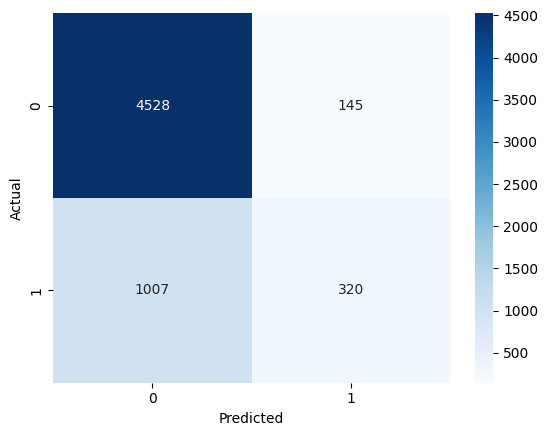

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



The classification results show an overall accuracy of 81%, indicating that the model performs reasonably well on the dataset.

It is very strong at predicting class 0, achieving high precision (0.82) and an excellent recall (0.97), meaning it correctly identifies most negative cases with few false negatives.

However, the model struggles with class 1, where recall is quite low (0.24), indicating that many positive cases are missed despite a moderate precision of 0.69.

This imbalance in performance is reflected in the macro-average metrics, which are notably lower than the weighted averages, suggesting the model is biased toward the majority class.

Overall, while the model is reliable for identifying class 0, it requires improvement—such as better handling of class imbalance or threshold tuning—to effectively capture class 1 instances.